In [1]:
import pandas as pd
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

## Loading the runs

### Find the MLP performance for corresponding sessions

In [2]:
mlp_results = np.array(
    [83.45588235, 76.47058824, 75.73529412, 67.64705882, 63.60294118,
56.98529412, 73.52941176, 81.61764706, 71.69117647, 94.48529412,
81.25      , 71.32352941, 78.67647059, 51.10294118, 72.79411765,
93.75      , 78.30882353, 84.55882353, 77.20588235, 68.75      ,
71.32352941, 72.42647059, 77.57352941, 77.57352941, 44.48529412,
52.94117647, 68.38235294, 58.08823529, 51.83823529, 56.25      ,
83.82352941, 83.08823529, 73.52941176, 88.97058824, 76.10294118,
75.0        , 63.23529412, 84.55882353, 86.39705882, 92.27941176,
80.88235294, 65.07352941, 83.08823529, 83.45588235, 88.97058824,
94.48529412, 94.48529412, 90.80882353, 93.38235294, 31.25      ])

In [3]:
sess_ids = np.array([
        "758519303","759189643","759660390","759666166","759872185",
        "760269100","761730740","762415169","763646681","761624763", 
        "761944562","762250376","760260459","760659782","761269197", 
        "763949859","764897534","765427689","766755831","767254594",
        "768807532","764704289","765193831","766502238","777496949", 
        "778374308","779152062","777914830","778864809","779650018",
        "826187862","826773996","827833392","826338612","826819032", 
        "828816509","829283315","823453391","824434038","825180479", 
        "826659257","827300090","828475005","829520904","832883243", 
        "833704570","834403597","836968429","837360280","838633305" 
        ])

In [4]:
test_ids = np.array(["764704289", "765193831", "766502238", "777496949", "778374308", "779152062"])

In [22]:
# Find the indices of test_ids in sess_ids
indices = np.array([np.where(sess_ids == test_id)[0][0] for test_id in test_ids])

# Get the values from mlp_results corresponding to these indices
result_values = mlp_results[indices]
print(result_values/100)

[0.72426471 0.77573529 0.77573529 0.44485294 0.52941176 0.68382353]


## Helper Functions

In [ ]:
def get_all(pd, data_col):
    

## Getting runs data

In [7]:
#dend
finetuned_765193831 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/finetuned/765193831_finetuned.csv",usecols=["epoch", "(IMPOR)FINETUNE_ind_transfer_dend - val/session_765193831_accuracy_gabor_orientation"])
finetuned_764704289 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/finetuned/764704289_finetuned.csv",usecols=["epoch", "(IMPOR)FINETUNE_ind_transfer_dend - val/session_764704289_accuracy_gabor_orientation"])
finetuned_766502238 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/finetuned/766502238_finetuned.csv",usecols=["epoch", "(IMPOR)FINETUNE_ind_transfer_dend - val/session_766502238_accuracy_gabor_orientation"])
single_765193831 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/within-sess/val/765193831_with_ROI.csv",usecols=["epoch", "765193831 w/ ROI - val/session_765193831_accuracy_gabor_orientation"])
single_764704289 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/within-sess/val/764704289_with_ROI.csv",usecols=["epoch", "764704289 w/ ROI - val/session_764704289_accuracy_gabor_orientation"])
single_766502238 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/within-sess/val/766502238_with_ROI.csv",usecols=["epoch", "766502238 w/ ROI - val/session_766502238_accuracy_gabor_orientation"])

#soma
finetuned_777496949 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/finetuned/777496949_finetuned.csv",usecols=["epoch", "FINETUNE_ind_transfer_soma - val/session_777496949_accuracy_gabor_orientation"])
finetuned_778374308 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/finetuned/778374308_finetuned.csv",usecols=["epoch", "FINETUNE_ind_transfer_soma - val/session_778374308_accuracy_gabor_orientation"])
finetuned_779152062 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/finetuned/779152062_finetuned.csv",usecols=["epoch", "FINETUNE_ind_transfer_soma - val/session_779152062_accuracy_gabor_orientation"])
single_777496949 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/within-sess/val/777496949_with_ROI.csv",usecols=["epoch", "777496949 w/ ROI - val/session_777496949_accuracy_gabor_orientation"])
single_778374308 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/within-sess/val/778374308_with_ROI.csv",usecols=["epoch", "778374308 w/ ROI - val/session_778374308_accuracy_gabor_orientation"])
single_779152062 = pd.read_csv("/home/mila/x/xuejing.pan/POYO/results/within-sess/val/779152062_with_ROI.csv",usecols=["epoch", "779152062 w/ ROI - val/session_779152062_accuracy_gabor_orientation"])


In [12]:
#dend
single_765193831_accs = single_765193831["765193831 w/ ROI - val/session_765193831_accuracy_gabor_orientation"]
single_764704289_accs = single_764704289["764704289 w/ ROI - val/session_764704289_accuracy_gabor_orientation"]
single_766502238_accs = single_766502238["766502238 w/ ROI - val/session_766502238_accuracy_gabor_orientation"]
dend_single_epoch = single_766502238["epoch"]
dend_single_all = np.stack((single_765193831_accs,single_764704289_accs,single_766502238_accs))
dend_single_mean = np.mean(dend_single_all, axis=0)
dend_single_std = np.std(dend_single_all, axis=0)

finetuned_765193831_accs = finetuned_765193831["(IMPOR)FINETUNE_ind_transfer_dend - val/session_765193831_accuracy_gabor_orientation"]
finetuned_764704289_accs = finetuned_764704289["(IMPOR)FINETUNE_ind_transfer_dend - val/session_764704289_accuracy_gabor_orientation"]
finetuned_766502238_accs = finetuned_766502238["(IMPOR)FINETUNE_ind_transfer_dend - val/session_766502238_accuracy_gabor_orientation"]
dend_finetuned_all = np.stack((finetuned_765193831_accs,finetuned_764704289_accs,finetuned_766502238_accs))
dend_finetuned_mean = np.mean(dend_finetuned_all, axis=0)
dend_finetuned_std = np.std(dend_finetuned_all, axis=0)
dend_finetuned_epoch = finetuned_766502238["epoch"]
print(dend_single_std.shape)
print(dend_finetuned_mean.shape)


(150,)
(1000,)


In [17]:
#soma
single_777496949_accs = single_777496949["777496949 w/ ROI - val/session_777496949_accuracy_gabor_orientation"]
single_778374308_accs = single_778374308["778374308 w/ ROI - val/session_778374308_accuracy_gabor_orientation"]
single_779152062_accs = single_779152062["779152062 w/ ROI - val/session_779152062_accuracy_gabor_orientation"]
soma_single_epoch = single_779152062["epoch"]
soma_single_all = np.stack((single_777496949_accs, single_778374308_accs, single_779152062_accs))
soma_single_mean = np.mean(soma_single_all, axis=0)
soma_single_std = np.std(soma_single_all, axis=0)

finetuned_777496949_accs = finetuned_777496949["FINETUNE_ind_transfer_soma - val/session_777496949_accuracy_gabor_orientation"]
finetuned_778374308_accs = finetuned_778374308["FINETUNE_ind_transfer_soma - val/session_778374308_accuracy_gabor_orientation"]
finetuned_779152062_accs = finetuned_779152062["FINETUNE_ind_transfer_soma - val/session_779152062_accuracy_gabor_orientation"]
soma_finetuned_all = np.stack((finetuned_777496949_accs,finetuned_778374308_accs,finetuned_779152062_accs))
soma_finetuned_mean = np.mean(soma_finetuned_all, axis=0)
soma_finetuned_std = np.std(soma_finetuned_all, axis=0)
soma_finetuned_epoch = finetuned_766502238["epoch"]

## Plotting

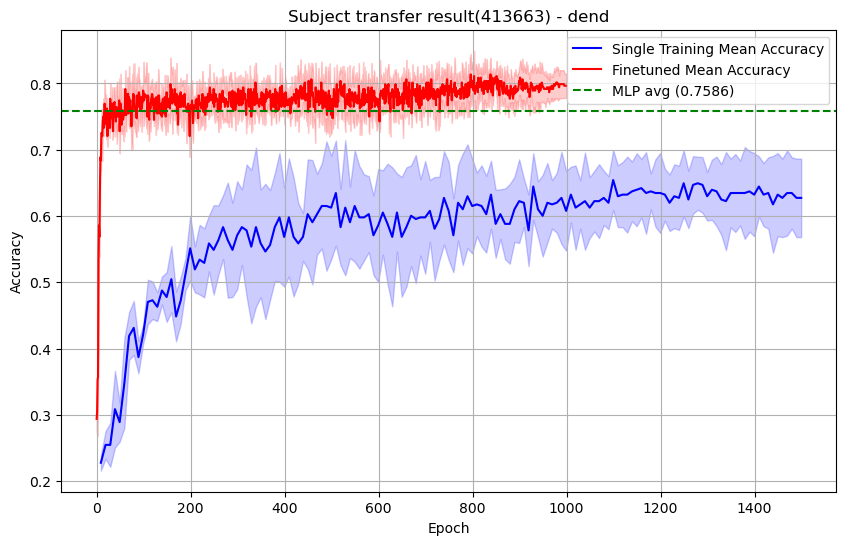

In [31]:
# Plotting
plt.figure(figsize=(10, 6))

# First line with error shading
plt.plot(dend_single_epoch, dend_single_mean, label='Single Training Mean Accuracy', color='blue')
plt.fill_between(dend_single_epoch, dend_single_mean - dend_single_std, dend_single_mean + dend_single_std, color='blue', alpha=0.2)

# Second line with error shading
plt.plot(dend_finetuned_epoch, dend_finetuned_mean, label='Finetuned Mean Accuracy', color='red')
plt.fill_between(dend_finetuned_epoch, dend_finetuned_mean - dend_finetuned_std, dend_finetuned_mean + dend_finetuned_std, color='red', alpha=0.2)

p = np.mean(np.array([0.7242647059,0.7757352941,0.7757352941]))
plt.axhline(y=p, color='green', linestyle='--', label=f'MLP avg ({p:.4f})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Subject transfer result(413663) - dend')
plt.legend()
plt.grid(True)
plt.show()

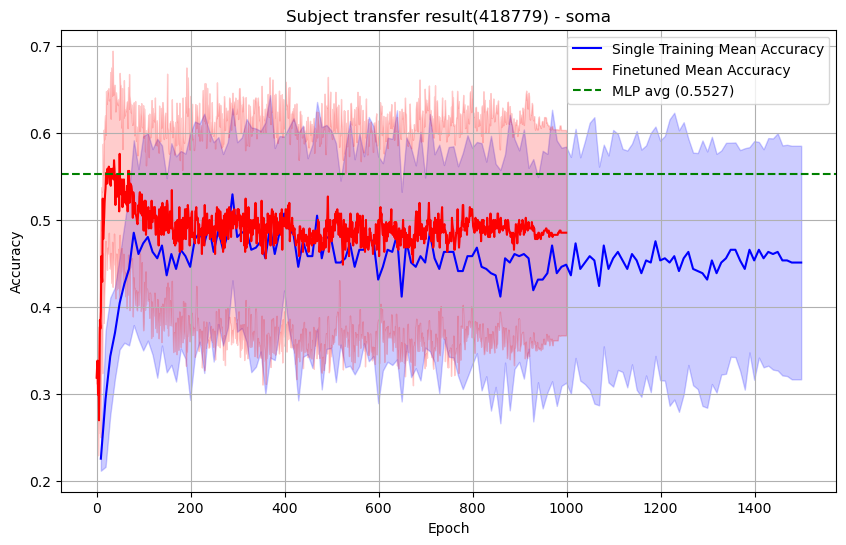

In [32]:
# Plotting
plt.figure(figsize=(10, 6))

# First line with error shading
plt.plot(soma_single_epoch, soma_single_mean, label='Single Training Mean Accuracy', color='blue')
plt.fill_between(soma_single_epoch, soma_single_mean - soma_single_std, soma_single_mean + soma_single_std, color='blue', alpha=0.2)

# Second line with error shading
plt.plot(soma_finetuned_epoch, soma_finetuned_mean, label='Finetuned Mean Accuracy', color='red')
plt.fill_between(soma_finetuned_epoch, soma_finetuned_mean - soma_finetuned_std, soma_finetuned_mean + soma_finetuned_std, color='red', alpha=0.2)

p = np.mean(np.array([0.44485294,0.52941176,0.68382353]))
plt.axhline(y=p, color='green', linestyle='--', label=f'MLP avg ({p:.4f})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Subject transfer result(418779) - soma')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
#soma session - plotting
def plot_soma_sess(accs_single, accs_finetuned, epochs_single, epochs_finetuned, mlp_result, sess_id):
    plt.figure(figsize=(10, 6))

    plt.plot(epochs_single, accs_single, label='Single Training Accuracy', color='blue')
    plt.plot(epochs_finetuned, accs_finetuned, label='Finetuned Training Accuracy', color='red')

    plt.axhline(y=mlp_result, color='green', linestyle='--', label=f'MLP avg ({mlp_result:.4f})')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'transfer result {sess_id} - soma')
    plt.legend()
    plt.grid(True)
    plt.show()

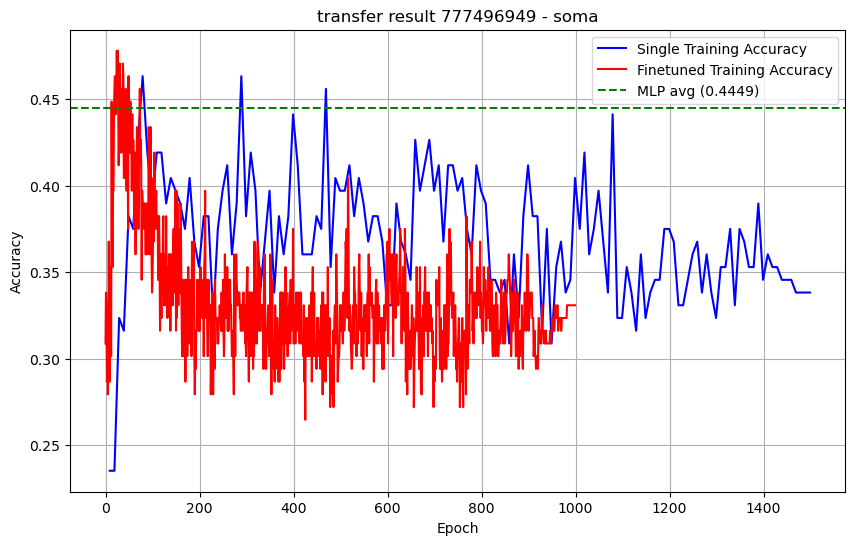

In [38]:
plot_soma_sess(single_777496949_accs, finetuned_777496949_accs,soma_single_epoch, soma_finetuned_epoch, 0.44485294, "777496949")

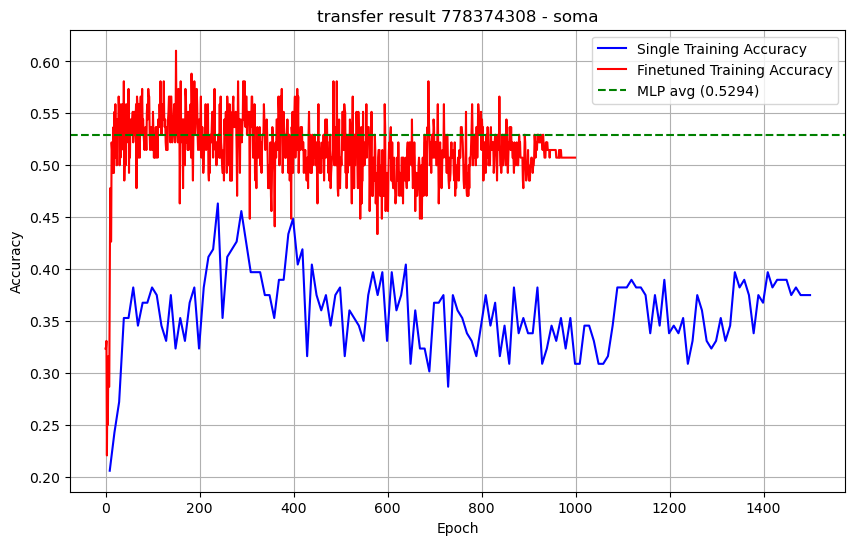

In [39]:
plot_soma_sess(single_778374308_accs, finetuned_778374308_accs,soma_single_epoch, soma_finetuned_epoch, 0.52941176, "778374308")

In [ ]:
plot_soma_sess(single_778374308_accs, finetuned_778374308_accs,soma_single_epoch, soma_finetuned_epoch, 0.52941176, "778374308")

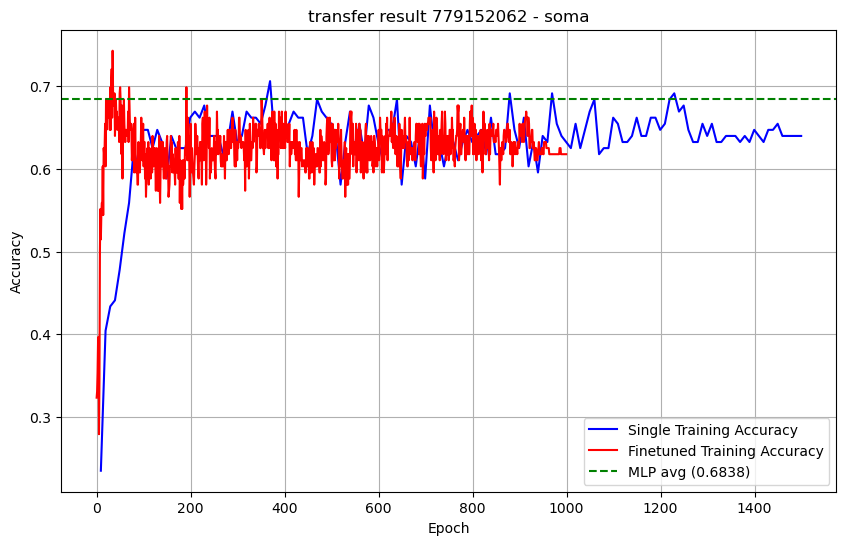

In [40]:
plot_soma_sess(single_779152062_accs, finetuned_779152062_accs,soma_single_epoch, soma_finetuned_epoch, 0.68382353, "779152062")